<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/support-vector-machines/svm_default_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [8]:
!pip3 install -U scikit-learn

In [5]:
!python --version

Python 3.7.13


**Import Data**

In [3]:
! wget https://raw.githubusercontent.com/fgith/data-science/main/datasets/default%20of%20credit%20card%20clients.csv

--2022-03-30 15:28:48--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/default%20of%20credit%20card%20clients.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2897296 (2.8M) [text/plain]
Saving to: ‘default of credit card clients.csv’

default of credit c 100%[===================>]   2.76M  --.-KB/s    in 0.07s   

2022-03-30 15:28:48 (41.7 MB/s) - ‘default of credit card clients.csv’ saved [2897296/2897296]



**Load Dataset**

In [4]:
df= pd.read_csv("default of credit card clients.csv",header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Modify column names**

In [5]:
df.rename({'default payment next month': 'DEFAULT'},axis=1,inplace= True)
df.drop("ID",axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Identify and Manage missing data**

In [6]:
#print(df['EDUCATION'].unique())
#df['MARRIAGE'].unique()

#len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE']==0)])  #=68
#len(df) #=30,000

df_no_missing = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE']!=0)]

**Downsample Data**

In [7]:
df_no_default = df_no_missing.loc[df['DEFAULT']==0]
df_default = df_no_missing.loc[df['DEFAULT']==1]

In [8]:
df_default_downsampled = resample(df_default,replace=False,n_samples=1000,random_state=42)
df_no_default_downsampled = resample(df_no_default,replace=False,n_samples=1000,random_state=42)

In [9]:
df_downsample = pd.concat([df_default_downsampled,df_no_default_downsampled])
len(df_downsample)

2000

**Assign X and Y variables**

In [10]:
Y = df_downsample['DEFAULT'].copy()
X = df_downsample.drop('DEFAULT',axis=1).copy()

**One-Hot Encoding to handle categorical valued columns like MARRIAGE**

In [13]:
X_encoded = pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,0,1,0,0,0,0,0,0,0,0


**Centering and Scaling after Splliting into Train and Test**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

**Build preliminary SVM**

In [16]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,Y_train)

SVC(random_state=42)

**Confusion Matrix. Pass test data into svm classifier and see how it does**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


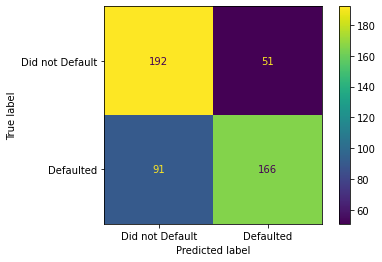

In [20]:
plot_confusion_matrix(clf_svm,X_test_scaled,Y_test,values_format='d',display_labels=["Did not Default","Defaulted"])

**Use Cross-Validation to improve regularization parameter C and gamma**

In [21]:
param_grid = [
              {
                  'C': [0.5,1,10,100],
               'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']
              }
]
optimal_params = GridSearchCV(SVC(),
                                  param_grid,
                                  cv=5,
                                  scoring='accuracy'
                                  )
optimal_params.fit(X_train_scaled,Y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


**Build Final SVM**

In [22]:
clf_svm = SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,Y_train)

SVC(C=100, gamma=0.001, random_state=42)

**Plot new confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


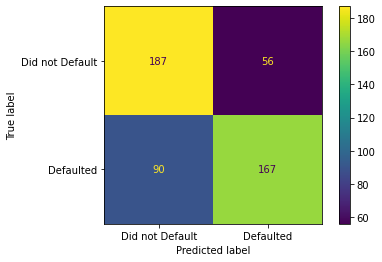

In [24]:
plot_confusion_matrix(clf_svm,X_test_scaled,Y_test,values_format='d',display_labels=["Did not Default","Defaulted"])